**Problem Statement: Life Insurance Data**

**The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high performing agents and upskill programs for low performing agents.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Sales.xlsx',sheet_name='Sales')

In [3]:
df.head().T
#Null values can be seen in CustTenure,In Gender column Female is written differently in different places.
#Same is with the Designation column where Executive is written differently as Exe in different places.

,0,1,2,3,4
CustID,7000000,7000001,7000002,7000003,7000004
AgentBonus,4409,2214,4273,1791,2955
Age,22.0,11.0,26.0,11.0,6.0
CustTenure,4.0,2.0,4.0,NaN,NaN
Channel,Agent,Third Party Partner,Agent,Third Party Partner,Agent
Occupation,Salaried,Salaried,Free Lancer,Salaried,Small Business
EducationField,Graduate,Graduate,Post Graduate,Graduate,UG
Gender,Female,Male,Male,Fe male,Male
ExistingProdType,3,4,4,3,3
Designation,Manager,Manager,Exe,Executive,Executive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [5]:
df.shape

(4520, 20)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [7]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [8]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [9]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   ExistingProdType      4520 non-null   int64  
 5   NumberOfPolicy        4475 non-null   float64
 6   MonthlyIncome         4284 non-null   float64
 7   Complaint             4520 non-null   int64  
 8   ExistingPolicyTenure  4336 non-null   float64
 9   SumAssured            4366 non-null   float64
 10  LastMonthCalls        4520 non-null   int64  
 11  CustCareScore         4468 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 423.9 KB


In [10]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Channel         4520 non-null   object
 1   Occupation      4520 non-null   object
 2   EducationField  4520 non-null   object
 3   Gender          4520 non-null   object
 4   Designation     4520 non-null   object
 5   MaritalStatus   4520 non-null   object
 6   Zone            4520 non-null   object
 7   PaymentMethod   4520 non-null   object
dtypes: object(8)
memory usage: 282.6+ KB


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='median')

In [12]:
imr = imputer.fit(df_num)
df_num = pd.DataFrame(imr.transform(df_num), columns=df_num.columns)

In [13]:
df_num.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [14]:
df_new = pd.concat([df_num, df_cat], axis=1, join='inner')

In [15]:
df_new.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
LastMonthCalls          0
CustCareScore           0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
Designation             0
MaritalStatus           0
Zone                    0
PaymentMethod           0
dtype: int64

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   float64
 1   AgentBonus            4520 non-null   float64
 2   Age                   4520 non-null   float64
 3   CustTenure            4520 non-null   float64
 4   ExistingProdType      4520 non-null   float64
 5   NumberOfPolicy        4520 non-null   float64
 6   MonthlyIncome         4520 non-null   float64
 7   Complaint             4520 non-null   float64
 8   ExistingPolicyTenure  4520 non-null   float64
 9   SumAssured            4520 non-null   float64
 10  LastMonthCalls        4520 non-null   float64
 11  CustCareScore         4520 non-null   float64
 12  Channel               4520 non-null   object 
 13  Occupation            4520 non-null   object 
 14  EducationField        4520 non-null   object 
 15  Gender               

In [17]:
df_new.duplicated().values.any()

False

**Categorical Columns are Channel,Occupation,Educational Field,Gender,Existing Prod Type,Designation,Number of Policy,Marital Status,Complaint,Zone,Payment Method and CustCareScore.**

In [18]:
print('1. Categories in Column Channel is',df_new['Channel'].unique())
print('2. Categories in Column Occupation is',df_new['Occupation'].unique())
print('3. Categories in Column Educational Field is',df_new['EducationField'].unique())
print('4. Categories in Column Gender is',df_new['Gender'].unique())
print('5. Categories in Column Existing Prod Type is',df_new['ExistingProdType'].unique())
print('6. Categories in Column Designation is',df_new['Designation'].unique())
print('7. Categories in Column Number Of Policy is',df_new['NumberOfPolicy'].unique())
print('8. Categories in Column Marital Status  is',df_new['MaritalStatus'].unique())
print('9. Categories in Column Complaint is',df_new['Complaint'].unique())
print('10. Categories in Column Zone is',df_new['Zone'].unique())
print('11. Categories in Column Payment Method is',df_new['PaymentMethod'].unique())
print('12. Categories in Column Cust Care Score is',df_new['CustCareScore'].unique())

1. Categories in Column Channel is ['Agent' 'Third Party Partner' 'Online']
2. Categories in Column Occupation is ['Salaried' 'Free Lancer' 'Small Business' 'Laarge Business'
 'Large Business']
3. Categories in Column Educational Field is ['Graduate' 'Post Graduate' 'UG' 'Under Graduate' 'Engineer' 'Diploma'
 'MBA']
4. Categories in Column Gender is ['Female' 'Male' 'Fe male']
5. Categories in Column Existing Prod Type is [3. 4. 2. 5. 1. 6.]
6. Categories in Column Designation is ['Manager' 'Exe' 'Executive' 'VP' 'AVP' 'Senior Manager']
7. Categories in Column Number Of Policy is [2. 4. 3. 5. 1. 6.]
8. Categories in Column Marital Status  is ['Single' 'Divorced' 'Unmarried' 'Married']
9. Categories in Column Complaint is [1. 0.]
10. Categories in Column Zone is ['North' 'West' 'East' 'South']
11. Categories in Column Payment Method is ['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']
12. Categories in Column Cust Care Score is [2. 3. 5. 4. 1.]


In [19]:
#Columns Occupation,Educational Field,Gender,Designation,Marital Status needs correction.

In [20]:
df_new['Occupation']=np.where(df_new['Occupation'] =='Laarge Business', "Large Business", df_new['Occupation'])
df_new['EducationField']=np.where(df_new['EducationField'] =='UG', "Under Graduate", df_new['EducationField'])
df_new['Gender']=np.where(df_new['Gender'] =='Fe male', "Female", df_new['Gender'])
df_new['Designation']=np.where(df_new['Designation'] =='Exe', "Executive", df_new['Designation'])
df_new['MaritalStatus']=np.where(df_new['MaritalStatus'] =='Single', "Unmarried", df_new['MaritalStatus'])

In [21]:
print('1. Categories in Column Channel is',df_new['Channel'].unique())
print('2. Categories in Column Occupation is',df_new['Occupation'].unique())
print('3. Categories in Column Educational Field is',df_new['EducationField'].unique())
print('4. Categories in Column Gender is',df_new['Gender'].unique())
print('5. Categories in Column Existing Prod Type is',df_new['ExistingProdType'].unique())
print('6. Categories in Column Designation is',df_new['Designation'].unique())
print('7. Categories in Column Number Of Policy is',df_new['NumberOfPolicy'].unique())
print('8. Categories in Column Marital Status  is',df_new['MaritalStatus'].unique())
print('9. Categories in Column Complaint is',df_new['Complaint'].unique())
print('10. Categories in Column Zone is',df_new['Zone'].unique())
print('11. Categories in Column Payment Method is',df_new['PaymentMethod'].unique())
print('12. Categories in Column Cust Care Score is',df_new['CustCareScore'].unique())

1. Categories in Column Channel is ['Agent' 'Third Party Partner' 'Online']
2. Categories in Column Occupation is ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
3. Categories in Column Educational Field is ['Graduate' 'Post Graduate' 'Under Graduate' 'Engineer' 'Diploma' 'MBA']
4. Categories in Column Gender is ['Female' 'Male']
5. Categories in Column Existing Prod Type is [3. 4. 2. 5. 1. 6.]
6. Categories in Column Designation is ['Manager' 'Executive' 'VP' 'AVP' 'Senior Manager']
7. Categories in Column Number Of Policy is [2. 4. 3. 5. 1. 6.]
8. Categories in Column Marital Status  is ['Unmarried' 'Divorced' 'Married']
9. Categories in Column Complaint is [1. 0.]
10. Categories in Column Zone is ['North' 'West' 'East' 'South']
11. Categories in Column Payment Method is ['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']
12. Categories in Column Cust Care Score is [2. 3. 5. 4. 1.]


In [22]:
df_new.shape

(4520, 20)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'CustID'),
  Text(2, 0, 'AgentBonus'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'CustTenure'),
  Text(5, 0, 'ExistingProdType'),
  Text(6, 0, 'NumberOfPolicy'),
  Text(7, 0, 'MonthlyIncome'),
  Text(8, 0, 'Complaint'),
  Text(9, 0, 'ExistingPolicyTenure'),
  Text(10, 0, 'SumAssured'),
  Text(11, 0, 'LastMonthCalls'),
  Text(12, 0, 'CustCareScore')])

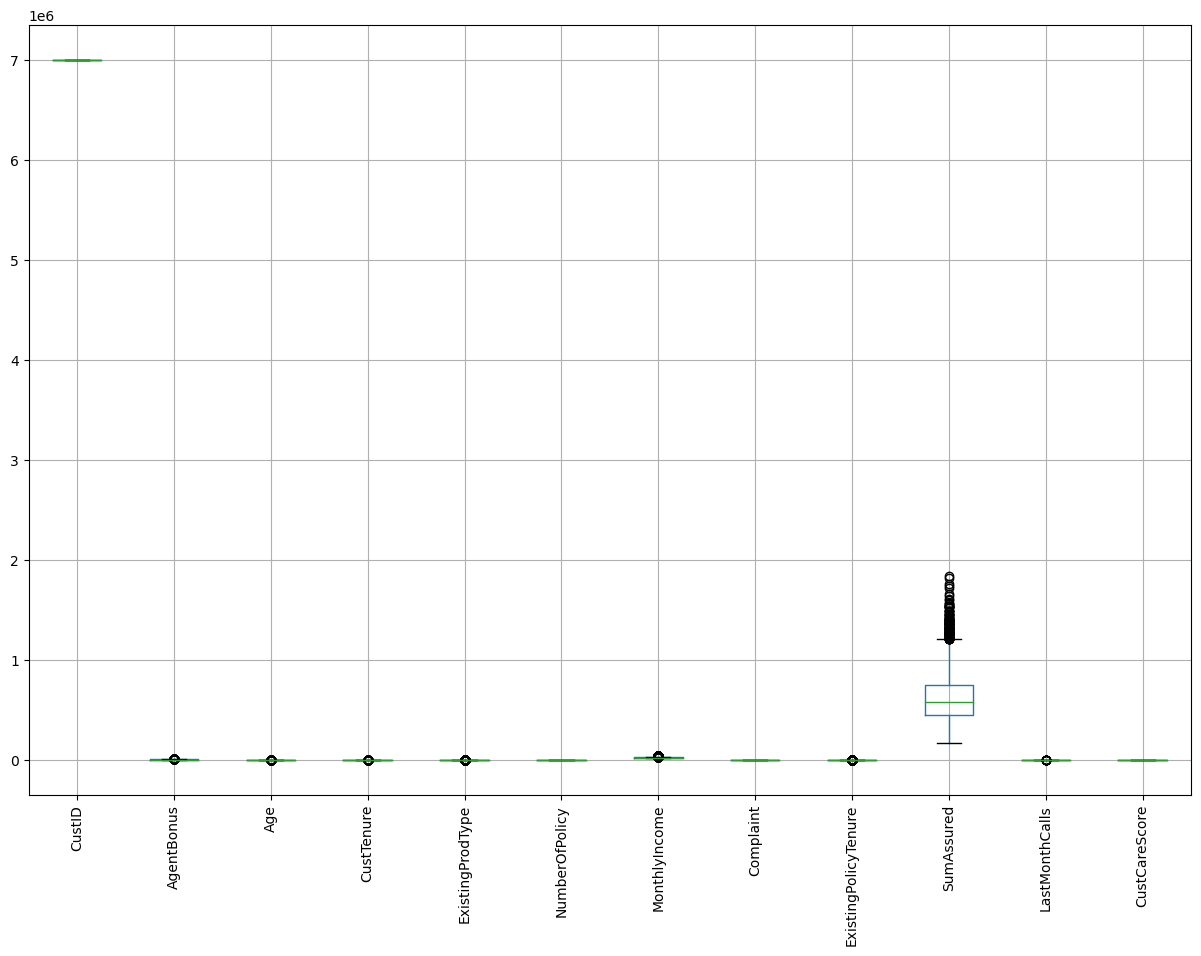

In [23]:
plt.figure(figsize=(15,10))
df_new.boxplot()
plt.xticks(rotation=90)

In [24]:
## Using Zscore for scaling/standardisation
from scipy.stats import zscore

In [25]:
cat=[]
num=[]
for i in df_new.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'Zone', 'PaymentMethod']
['CustID', 'AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']


In [26]:
from scipy.stats import zscore
df_scaled=df_new[num].apply(zscore)

In [27]:
df_scaled.head().T

,0,1,2,3,4
CustID,-1.731668,-1.730901,-1.730135,-1.729368,-1.728602
AgentBonus,0.236010,-1.328309,0.139087,-1.629770,-0.800217
Age,0.865868,-0.388311,1.321933,-0.388311,-0.958393
CustTenure,-1.189214,-1.418006,-1.189214,-0.159648,-0.159648
ExistingProdType,-0.678318,0.306267,0.306267,-0.678318,-0.678318
NumberOfPolicy,-1.083186,0.296941,-0.393123,-0.393123,0.296941
MonthlyIncome,-0.384155,-0.565291,-1.203361,-1.031460,-0.914131
Complaint,1.575525,-0.634709,1.575525,1.575525,-0.634709
ExistingPolicyTenure,-0.634461,-0.330028,-0.634461,-0.634461,-0.025594
SumAssured,0.777226,-1.338756,-0.163681,-1.445604,-1.041747


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'CustID'),
  Text(2, 0, 'AgentBonus'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'CustTenure'),
  Text(5, 0, 'ExistingProdType'),
  Text(6, 0, 'NumberOfPolicy'),
  Text(7, 0, 'MonthlyIncome'),
  Text(8, 0, 'Complaint'),
  Text(9, 0, 'ExistingPolicyTenure'),
  Text(10, 0, 'SumAssured'),
  Text(11, 0, 'LastMonthCalls'),
  Text(12, 0, 'CustCareScore')])

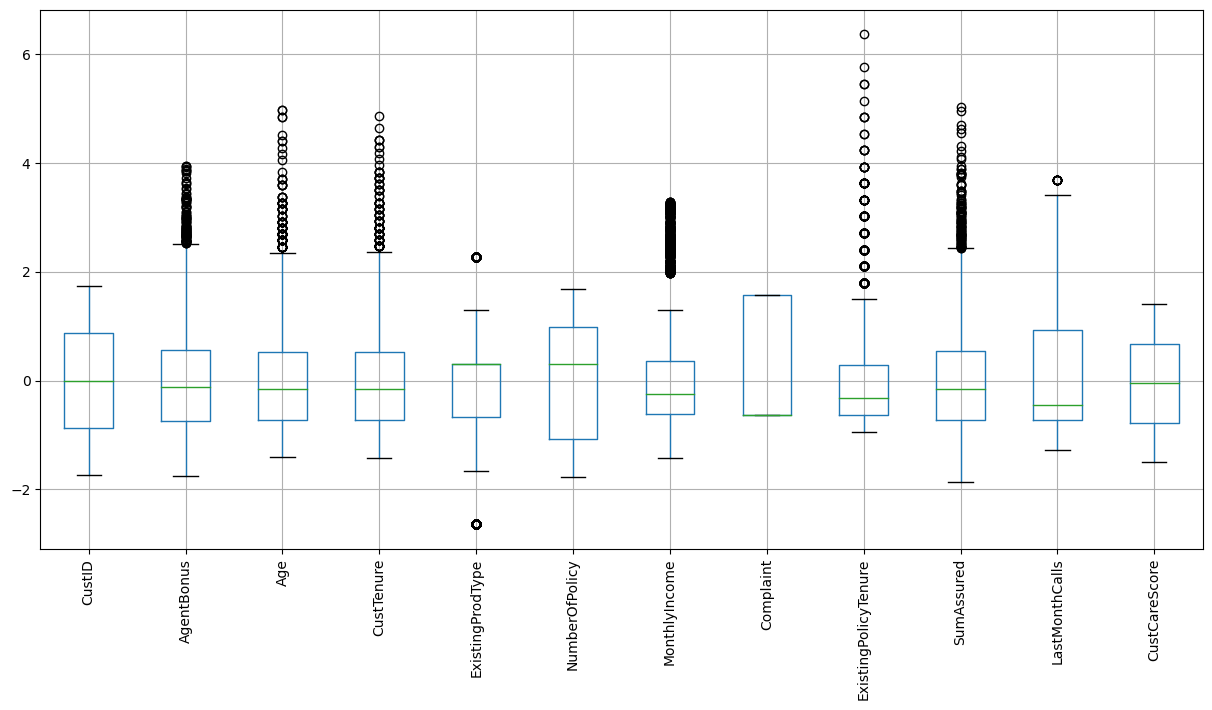

In [28]:
plt.figure(figsize=(15,7))
df_scaled.boxplot()
plt.xticks(rotation=90)

In [29]:
def remove_outlier(col):
    Q1,Q3= col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
for i in df_scaled.columns:
    lr, ur = remove_outlier(df_scaled[i])
    df_scaled[i] = np.where(df_scaled[i]>ur,ur,df_scaled[i])
    df_scaled[i] = np.where(df_scaled[i]<lr,lr,df_scaled[i])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'CustID'),
  Text(2, 0, 'AgentBonus'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'CustTenure'),
  Text(5, 0, 'ExistingProdType'),
  Text(6, 0, 'NumberOfPolicy'),
  Text(7, 0, 'MonthlyIncome'),
  Text(8, 0, 'Complaint'),
  Text(9, 0, 'ExistingPolicyTenure'),
  Text(10, 0, 'SumAssured'),
  Text(11, 0, 'LastMonthCalls'),
  Text(12, 0, 'CustCareScore')])

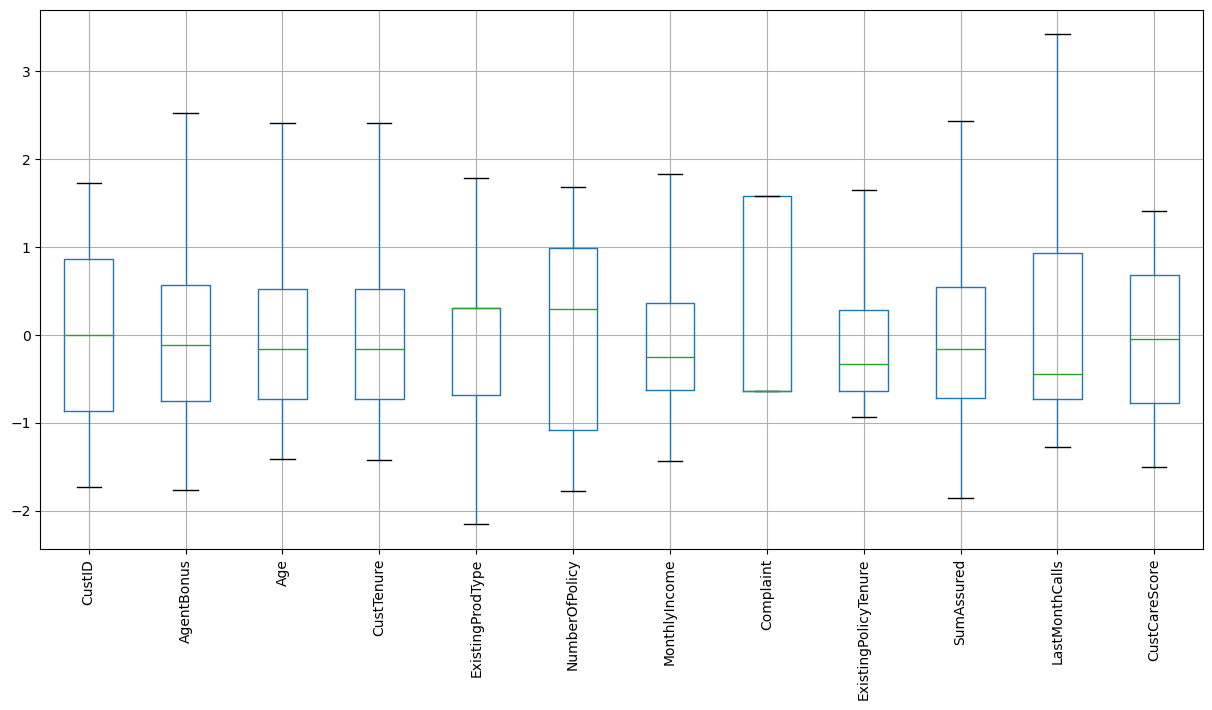

In [31]:
plt.figure(figsize=(15,7))
df_scaled.boxplot()
plt.xticks(rotation=90)

In [32]:
#plt.figure(figsize=(10,7))
#sns.pairplot(df_scaled)

<Axes: >

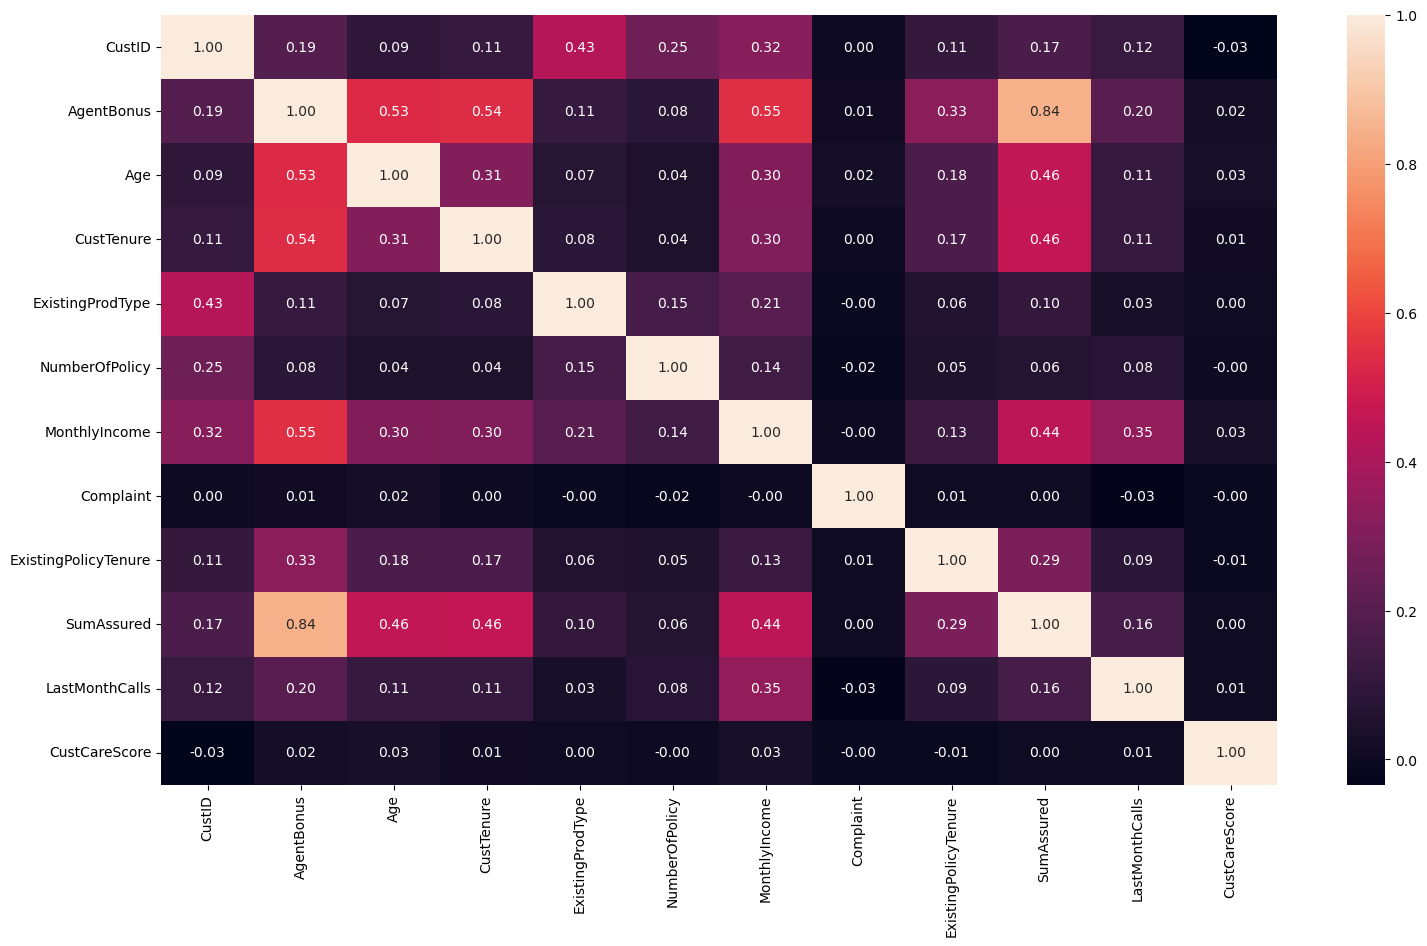

In [33]:
plt.figure(figsize=(18,10))
sns.heatmap(df_scaled.corr(), annot=True, fmt='0.2f')

In [34]:
print("skeness of data frame is",df_scaled.skew())
print("kurtosis of data frame is ", df_scaled.kurtosis())

skeness of data frame is CustID                  1.006412e-16
AgentBonus              6.300682e-01
Age                     7.176793e-01
CustTenure              6.925499e-01
ExistingProdType       -3.037944e-01
NumberOfPolicy         -1.081606e-01
MonthlyIncome           8.418956e-01
Complaint               9.411289e-01
ExistingPolicyTenure    8.226030e-01
SumAssured              6.702065e-01
LastMonthCalls          7.909360e-01
CustCareScore          -1.381202e-01
dtype: float64
kurtosis of data frame is  CustID                 -1.200000
AgentBonus             -0.034675
Age                    -0.168247
CustTenure             -0.195246
ExistingProdType       -0.186574
NumberOfPolicy         -0.873539
MonthlyIncome           0.099471
Complaint              -1.114770
ExistingPolicyTenure   -0.486630
SumAssured             -0.008944
LastMonthCalls          0.071132
CustCareScore          -1.103857
dtype: float64


In [35]:
print(np.sqrt(df_scaled).skew())

CustID                 -0.566023
AgentBonus              0.243583
Age                     0.039725
CustTenure              0.087018
ExistingProdType        0.930280
NumberOfPolicy          0.268238
MonthlyIncome           0.061176
Complaint               0.000000
ExistingPolicyTenure   -0.143640
SumAssured              0.137974
LastMonthCalls          0.018464
CustCareScore          -0.078080
dtype: float64


C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [36]:
df_new[cat]

,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone,PaymentMethod
0,Agent,Salaried,Graduate,Female,Manager,Unmarried,North,Half Yearly
1,Third Party Partner,Salaried,Graduate,Male,Manager,Divorced,North,Yearly
2,Agent,Free Lancer,Post Graduate,Male,Executive,Unmarried,North,Yearly
3,Third Party Partner,Salaried,Graduate,Female,Executive,Divorced,West,Half Yearly
4,Agent,Small Business,Under Graduate,Male,Executive,Divorced,West,Half Yearly
...,...,...,...,...,...,...,...,...
4515,Agent,Small Business,Graduate,Male,Senior Manager,Unmarried,West,Yearly
4516,Agent,Salaried,Under Graduate,Female,Executive,Married,North,Yearly
4517,Agent,Salaried,Engineer,Female,AVP,Unmarried,North,Half Yearly
4518,Online,Small Business,Graduate,Female,Executive,Unmarried,West,Half Yearly


In [37]:
df_new1 =pd.get_dummies(df_new,drop_first=True)

In [38]:
df_new1.head(10).T

,0,1,2,3,4,5,6,7,8,9
CustID,7000000.0,7000001.0,7000002.0,7000003.0,7000004.0,7000005.0,7000006.0,7000007.0,7000008.0,7000009.0
AgentBonus,4409.0,2214.0,4273.0,1791.0,2955.0,3252.0,3850.0,2073.0,2719.0,3247.0
Age,22.0,11.0,26.0,11.0,6.0,7.0,12.0,6.0,8.0,6.0
CustTenure,4.0,2.0,4.0,13.0,13.0,13.0,23.0,4.0,11.0,3.0
ExistingProdType,3.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,2.0
NumberOfPolicy,2.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,3.0,2.0
MonthlyIncome,20993.0,20130.0,17090.0,17909.0,18468.0,18068.0,34999.0,17279.0,20916.0,17089.0
Complaint,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
ExistingPolicyTenure,2.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0
SumAssured,806761.0,294502.0,578976.5,268635.0,366405.0,487836.0,392689.0,369079.0,405143.0,578976.5


In [39]:
df_new1.shape

(4520, 35)

In [40]:
#K Means Cluster

In [41]:
from sklearn.cluster import KMeans 

In [42]:
k_means = KMeans(n_clusters = 2)

In [43]:
k_means.fit(df_new1)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [44]:
k_means.labels_

array([1, 0, 0, ..., 0, 1, 1])

In [45]:
df_new1['Cluster']=k_means.labels_

In [46]:
df_new1['Cluster'].head(10).T

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Cluster, dtype: int32

In [47]:
df_new1['Cluster'].value_counts()

0    3112
1    1408
Name: Cluster, dtype: int64

In [48]:
df_new1.groupby(by='Cluster').nunique()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,...,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
Cluster,,,,,,,,,,,,,,,,,,,,,
0,3112,2017,38,36,6,6,1991,2,18,2952,...,2,2,2,2,2,2,2,2,2,2
1,1408,1161,51,52,6,6,1041,2,24,1405,...,2,2,2,2,2,2,2,2,2,2


In [49]:
df_new1.groupby(by='Cluster').mean().T

Cluster,0,1
CustID,7.002141e+06,7.002522e+06
AgentBonus,3.433636e+03,5.501672e+03
Age,1.209672e+01,1.950923e+01
CustTenure,1.211086e+01,1.944531e+01
ExistingProdType,3.631748e+00,3.815341e+00
NumberOfPolicy,3.513496e+00,3.693892e+00
MonthlyIncome,2.165613e+04,2.540287e+04
Complaint,2.933805e-01,2.734375e-01
ExistingPolicyTenure,3.495501e+00,5.384943e+00
SumAssured,4.886568e+05,9.058105e+05


In [50]:
#Now we will scale the data to build models
df_final=df_new1.apply(zscore)

In [51]:
#Train and Test Split

In [52]:
X = df_final.drop("AgentBonus" , axis=1)

y = df_final.pop("AgentBonus")

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [54]:
#Linear Regression Model

In [55]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

In [56]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [57]:
regression_model.score(X_train, y_train)

0.8104530332014905

In [58]:
mse_train = np.mean((regression_model.predict(X_train)-y_train)**2)

In [59]:
mse_train

0.19022963715967411

In [60]:
import math

math.sqrt(mse_train)

0.43615322669868456

In [61]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.799819921795736

In [62]:
LR_MAPE = (abs(y_train - (regression_model.predict(X_train))/y_train )*100).mean()
LR_MAPE

228.57147730517784

In [63]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head().T

,2461,3681,1309,4254,1335
CustID,0.154428,1.089429,-0.728458,1.528573,-0.708531
Age,-0.274295,1.892015,0.067754,-1.072409,-0.730360
CustTenure,0.183540,0.069144,-0.960421,0.183540,0.297936
ExistingProdType,0.306267,0.306267,-0.678318,0.306267,-2.647486
NumberOfPolicy,-0.393123,0.987005,-1.773250,-1.083186,-1.773250
MonthlyIncome,-0.436837,0.120635,-1.383448,0.149600,-1.165791
Complaint,1.575525,-0.634709,-0.634709,-0.634709,-0.634709
ExistingPolicyTenure,-0.025594,-0.025594,0.583273,-0.938895,0.583273
SumAssured,-0.569217,-0.003697,-0.682563,-1.389584,0.543446
LastMonthCalls,-1.002006,-0.725742,-1.278269,0.931839,-1.002006


In [64]:
X_train.shape

(3164, 35)

In [65]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for CustID is 0.017635761451338005
The coefficient for Age is 0.13817890383486173
The coefficient for CustTenure is 0.14780222965461057
The coefficient for ExistingProdType is 0.02627027878449622
The coefficient for NumberOfPolicy is 0.0062212854562025514
The coefficient for MonthlyIncome is 0.09505445597095781
The coefficient for Complaint is 0.01482240096396285
The coefficient for ExistingPolicyTenure is 0.08499903519921198
The coefficient for SumAssured is 0.5803750526164702
The coefficient for LastMonthCalls is -0.009701015579455522
The coefficient for CustCareScore is 0.010713741776047713
The coefficient for Channel_Online is 0.00645138155647337
The coefficient for Channel_Third Party Partner is 0.0026647410632010425
The coefficient for Occupation_Large Business is -0.11759725436552186
The coefficient for Occupation_Salaried is -0.15200340761035697
The coefficient for Occupation_Small Business is -0.1933276874001378
The coefficient for EducationField_Engineer is 0.

In [66]:
for idx, col_name in enumerate(X_test.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for CustID is 0.017635761451338005
The coefficient for Age is 0.13817890383486173
The coefficient for CustTenure is 0.14780222965461057
The coefficient for ExistingProdType is 0.02627027878449622
The coefficient for NumberOfPolicy is 0.0062212854562025514
The coefficient for MonthlyIncome is 0.09505445597095781
The coefficient for Complaint is 0.01482240096396285
The coefficient for ExistingPolicyTenure is 0.08499903519921198
The coefficient for SumAssured is 0.5803750526164702
The coefficient for LastMonthCalls is -0.009701015579455522
The coefficient for CustCareScore is 0.010713741776047713
The coefficient for Channel_Online is 0.00645138155647337
The coefficient for Channel_Third Party Partner is 0.0026647410632010425
The coefficient for Occupation_Large Business is -0.11759725436552186
The coefficient for Occupation_Salaried is -0.15200340761035697
The coefficient for Occupation_Small Business is -0.1933276874001378
The coefficient for EducationField_Engineer is 0.

In [67]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'AgentBonus ~ CustID+Age+CustTenure+SumAssured+ExistingProdType+NumberOfPolicy+LastMonthCalls+CustCareScore+Channel_Online+Gender_Male+Zone_North+Zone_South+Zone_West+Designation_Executive+Designation_Manager+Cluster', data = data_train).fit()
lm1.params

Intercept               -0.002127
CustID                   0.053416
Age                      0.153025
CustTenure               0.162718
SumAssured               0.618816
ExistingProdType        -0.009708
NumberOfPolicy           0.015376
LastMonthCalls           0.002273
CustCareScore            0.013604
Channel_Online           0.003974
Gender_Male              0.008916
Zone_North               0.010581
Zone_South               0.000850
Zone_West                0.014237
Designation_Executive   -0.181978
Designation_Manager     -0.142476
Cluster                  0.008182
dtype: float64

In [68]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     766.8
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:12:31   Log-Likelihood:                -1981.5
No. Observations:                3164   AIC:                             3997.
Df Residuals:                    3147   BIC:                             4100.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.00

In [69]:
regression_model = LinearRegression()
regression_model.fit(X_test, y_test)

LinearRegression()

In [70]:
y_test.head()

610     1.148233
1519    1.767546
1620   -1.173659
2031    0.294450
494    -1.184349
Name: AgentBonus, dtype: float64

In [71]:
data_test = pd.concat([X_test, y_test], axis=1)
data_test.head().T

,610,1519,1620,2031,494
CustID,-1.264167,-0.567515,-0.490109,-0.175121,-1.353069
Age,-0.388311,0.637835,-0.844377,-0.160279,-0.274295
CustTenure,0.984313,-0.846025,0.069144,0.869917,-0.045252
ExistingProdType,-0.678318,-0.678318,-0.678318,-0.678318,-0.678318
NumberOfPolicy,-1.083186,-1.773250,-1.773250,0.296941,-0.393123
MonthlyIncome,-0.014116,2.454419,-0.866066,-0.301877,-1.167890
Complaint,-0.634709,-0.634709,-0.634709,1.575525,-0.634709
ExistingPolicyTenure,-0.938895,-0.330028,-0.025594,-0.025594,-0.938895
SumAssured,0.687677,2.402218,-0.778155,1.099155,-1.507267
LastMonthCalls,-0.173215,0.379312,0.931839,0.655576,-1.278269


In [72]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'AgentBonus ~ CustID+Age+CustTenure+SumAssured+ExistingProdType+NumberOfPolicy+LastMonthCalls+CustCareScore+Channel_Online+Gender_Male+Zone_North+Zone_South+Zone_West+Designation_Executive+Designation_Manager+Cluster', data = data_test).fit()
lm2.params

Intercept                0.005148
CustID                   0.059921
Age                      0.179033
CustTenure               0.169189
SumAssured               0.615135
ExistingProdType         0.003127
NumberOfPolicy          -0.016021
LastMonthCalls           0.006474
CustCareScore            0.005418
Channel_Online          -0.000283
Gender_Male             -0.014603
Zone_North              -0.102132
Zone_South              -0.021251
Zone_West               -0.099993
Designation_Executive   -0.178299
Designation_Manager     -0.142622
Cluster                 -0.000432
dtype: float64

In [73]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     313.4
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:12:31   Log-Likelihood:                -862.67
No. Observations:                1356   AIC:                             1759.
Df Residuals:                    1339   BIC:                             1848.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.00

In [74]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [75]:
mse

0.19062417852609684

In [76]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
from sklearn.metrics import r2_score
import math

math.sqrt(mse)

0.4366052891641337

In [77]:
# Model score - R2 or coeff of determinant

regression_model.score(X_test, y_test)

0.8077434283258387

In [78]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

In [79]:
LR_MAPE = (abs(y_test - (regression_model.predict(X_test))/y_test )*100).mean()
LR_MAPE

287.0199507840891

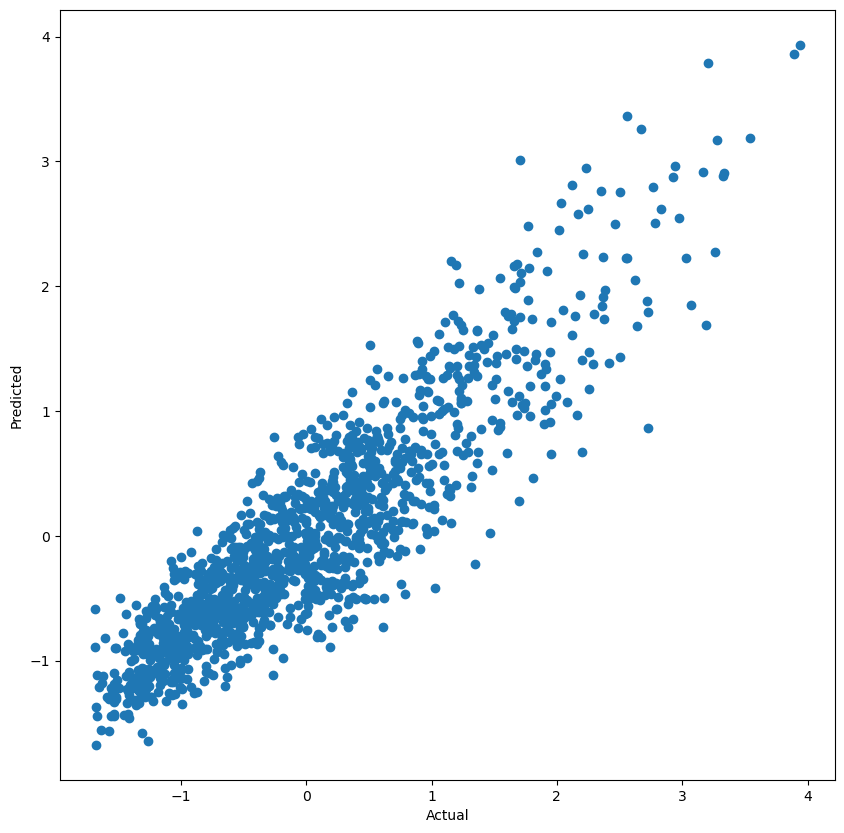

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.show()

In [81]:
#Model Tuning

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_jobs': [0,1,2]
}
grid_search_lr = GridSearchCV(estimator = regression_model, param_grid = param_grid, cv = 3)

In [83]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [0, 1, 2]})

In [84]:
grid_search_lr.best_params_

{'n_jobs': 0}

In [85]:
best_grid_lr = grid_search_lr.best_estimator_

In [86]:
ytrain_predict = best_grid_lr.predict(X_train)
ytest_predict = best_grid_lr.predict(X_test)

In [87]:
#Train data mse for best params for LR Model
mse_lr = np.mean((y_train-ytrain_predict)**2)

In [88]:
mse_lr

0.19022963715967411

In [89]:
math.sqrt(mse_lr)

0.43615322669868456

In [90]:
LR_MAPE = (abs(y_train - (best_grid_lr.predict(X_train))/y_train )*100).mean()
LR_MAPE

228.57147730517784

In [91]:
r2_score(y_train,ytrain_predict)

0.8104530332014905

In [92]:
#Test data mse for best params for LR Model
mse_lr2 = np.mean((y_test-ytest_predict)**2)

In [93]:
mse_lr2

0.1984804089279727

In [94]:
math.sqrt(mse_lr2)

0.44551140156899766

In [95]:
r2_score(y_test,ytest_predict)

0.799819921795736

In [96]:
LR_MAPE = (abs(y_test - (best_grid_lr.predict(X_test))/y_test )*100).mean()
LR_MAPE

287.75428429220375

**Random forest**

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rfcl = RandomForestRegressor(n_estimators = 15, random_state=1)
rfcl = rfcl.fit(X_train, y_train)

In [99]:
y_pred = rfcl.predict(X_train)
y_pred

array([-0.22599239,  0.83066532, -0.6307436 , ..., -0.39171281,
        0.83688934, -0.75379862])

In [100]:
r2_score(y_train,y_pred)

0.9754599234045213

In [101]:
mse_rf2 = np.mean((y_train-y_pred)**2)

In [102]:
mse_rf2

0.024628459877128712

In [103]:
math.sqrt(mse_rf2)

0.15693457196274094

In [104]:
RF_MAPE = (abs(y_train - (rfcl.predict(X_train))/y_train )*100).mean()
RF_MAPE

145.2527703284488

In [105]:
rfcl = RandomForestRegressor(n_estimators = 15, random_state=1)
rfcl = rfcl.fit(X_test, y_test)

In [106]:
y_pred = rfcl.predict(X_test)
y_pred

array([ 0.77037312,  1.8035601 , -1.09502684, ..., -1.03497219,
       -1.10533685,  0.34319643])

In [107]:
mse_rf_ = np.mean((y_test-y_pred)**2)

In [108]:
mse_rf_

0.029851972582641224

In [109]:
math.sqrt(mse_rf_)

0.17277723398249326

In [110]:
r2_score(y_test,y_pred)

0.9698923927131103

In [111]:
RF_MAPE = (abs(y_test - (rfcl.predict(X_test))/y_test )*100).mean()
RF_MAPE

176.57659206205543

In [112]:
#Model Tuning

In [113]:
param_grid_rf = {
    'max_depth': [5, 6],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 80],
    'min_samples_split': [50, 100],
    'n_estimators': [101, 201]
}

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid_rf, cv = 3)

In [114]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=15, random_state=1),
             param_grid={'max_depth': [5, 6], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 80],
                         'min_samples_split': [50, 100],
                         'n_estimators': [101, 201]})

In [115]:
grid_search_rf.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 201}

In [116]:
best_grid_rf = grid_search_rf.best_estimator_

In [117]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

In [118]:
#Train data mse for best params for RF Model
mse_rf = np.mean((y_train-ytrain_predict_rf)**2)

In [119]:
mse_rf

0.226246287894444

In [120]:
math.sqrt(mse_rf)

0.4756535376662766

In [121]:
r2_score(y_train,ytrain_predict_rf)

0.7745656341455451

In [122]:
RF_MAPE = (abs(y_train - (best_grid_rf.predict(X_train))/y_train )*100).mean()
RF_MAPE

230.0092704550092

In [123]:
#Test data mse for best params for LR Model
mse_rf2 = np.mean((y_test-ytest_predict_rf)**2)

In [124]:
mse_rf2

0.24044317885864108

In [125]:
math.sqrt(mse_rf2)

0.49035005746776567

In [126]:
r2_score(y_test,ytest_predict_rf)

0.7574978074280804

In [127]:
RF_MAPE = (abs(y_test - (best_grid_rf.predict(X_test))/y_test )*100).mean()
RF_MAPE

299.54816146899805

**KNN Model**

In [128]:
from sklearn.neighbors import KNeighborsRegressor

In [129]:
NNH = KNeighborsRegressor()

In [130]:
NNH.fit(X_train,y_train)

KNeighborsRegressor()

In [131]:
#import required packages
from sklearn.metrics import r2_score
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings(action= 'ignore')

In [132]:
mse_knn = np.mean((NNH.predict(X_train)-y_train)**2)

In [133]:
mse_knn

0.254054738047813

In [134]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_train) #make prediction on test set
    error = sqrt(mean_squared_error(y_train,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.40911035117597294
RMSE value for k=  3 is: 0.4677989799246946
RMSE value for k=  4 is: 0.4933074283760728
RMSE value for k=  5 is: 0.5040384291379111
RMSE value for k=  6 is: 0.5134540685673387
RMSE value for k=  7 is: 0.5204824797264683
RMSE value for k=  8 is: 0.5287959836167869
RMSE value for k=  9 is: 0.5342430887561889
RMSE value for k=  10 is: 0.5380210439882369
RMSE value for k=  11 is: 0.5427769510700745
RMSE value for k=  12 is: 0.548825571538184
RMSE value for k=  13 is: 0.5522674189697458
RMSE value for k=  14 is: 0.5566676362986848
RMSE value for k=  15 is: 0.559817868633404
RMSE value for k=  16 is: 0.5619005016063705
RMSE value for k=  17 is: 0.5639320563216919
RMSE value for k=  18 is: 0.5665361678735308
RMSE value for k=  19 is: 0.5687023017444042
RMSE value for k=  20 is: 0.5702347615286002


In [135]:
r2_score(y_train,pred)

0.6759992344922625

In [136]:
KNN_MAPE1 = (abs(y_train - (NNH.predict(X_train))/y_train )*100).mean()
KNN_MAPE1

236.35882296276495

In [137]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_test, y_test)  #fit the model
    pred1=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred1)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.42176017995104637
RMSE value for k=  3 is: 0.4901443267320123
RMSE value for k=  4 is: 0.5185876911850086
RMSE value for k=  5 is: 0.5434272427173505
RMSE value for k=  6 is: 0.5580703088010127
RMSE value for k=  7 is: 0.5645751096289601
RMSE value for k=  8 is: 0.5696407816852026
RMSE value for k=  9 is: 0.5742506772189082
RMSE value for k=  10 is: 0.5769481325477762
RMSE value for k=  11 is: 0.5842982596914011
RMSE value for k=  12 is: 0.5912103953757015
RMSE value for k=  13 is: 0.5963221648557314
RMSE value for k=  14 is: 0.6004796195987271
RMSE value for k=  15 is: 0.605018551709535
RMSE value for k=  16 is: 0.6065924942990755
RMSE value for k=  17 is: 0.6095442746470536
RMSE value for k=  18 is: 0.6128967098867445
RMSE value for k=  19 is: 0.6149247805434955
RMSE value for k=  20 is: 0.615737684698686


In [138]:
mse_knn2 = np.mean((NNH.predict(X_test)-y_test)**2)
mse_knn2

0.39243740020708795

In [139]:
r2_score(y_test,pred1)

0.6176204329047155

In [140]:
KNN_MAPE2 = (abs(y_test - (NNH.predict(X_test))/y_test )*100).mean()
KNN_MAPE2

403.24188541151153

<Axes: >

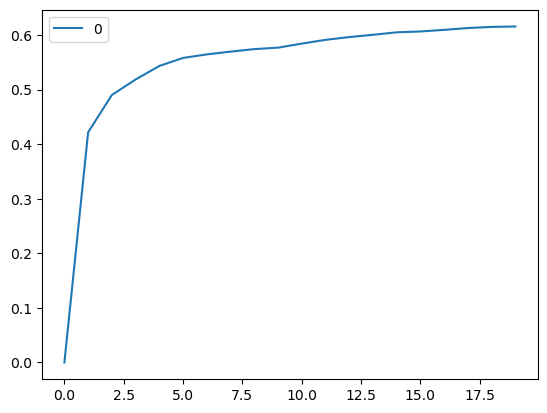

In [141]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [142]:
#Model Tuning

In [143]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[0,1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=5)
model_knn.fit(X_train,y_train)
model_knn.best_params_

{'n_neighbors': 9}

In [144]:
print('R2 score for KNN ',r2_score(y,model_knn.predict(X)))

R2 score for KNN  0.687552169208294


In [145]:
mse_knn3 = np.mean((model_knn.predict(X_train)-y_train)**2)
mse_knn3

0.2854156778837531

In [146]:
KNN_MAPE = (abs(y_train - (model_knn.predict(X_train))/y_train )*100).mean()
KNN_MAPE

247.79825669246821

In [147]:
rmse_val1 = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_knn2= neighbors.KNeighborsRegressor(n_neighbors = K)

    model_knn2.fit(X_test, y_test)  #fit the model
    pred=model_knn2.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val1.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.42176017995104637
RMSE value for k=  3 is: 0.4901443267320123
RMSE value for k=  4 is: 0.5185876911850086
RMSE value for k=  5 is: 0.5434272427173505
RMSE value for k=  6 is: 0.5580703088010127
RMSE value for k=  7 is: 0.5645751096289601
RMSE value for k=  8 is: 0.5696407816852026
RMSE value for k=  9 is: 0.5742506772189082
RMSE value for k=  10 is: 0.5769481325477762
RMSE value for k=  11 is: 0.5842982596914011
RMSE value for k=  12 is: 0.5912103953757015
RMSE value for k=  13 is: 0.5963221648557314
RMSE value for k=  14 is: 0.6004796195987271
RMSE value for k=  15 is: 0.605018551709535
RMSE value for k=  16 is: 0.6065924942990755
RMSE value for k=  17 is: 0.6095442746470536
RMSE value for k=  18 is: 0.6128967098867445
RMSE value for k=  19 is: 0.6149247805434955
RMSE value for k=  20 is: 0.615737684698686


<Axes: >

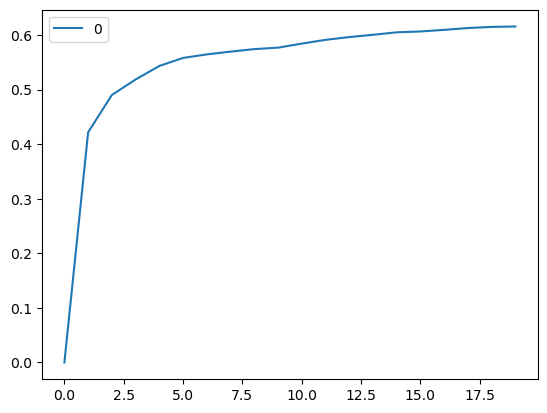

In [148]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val1) #elbow curve 
curve.plot()

In [149]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model_knn3 = GridSearchCV(knn, params, cv=5)
model_knn3.fit(X_test,y_test)
model_knn3.best_params_

{'n_neighbors': 9}

In [150]:
model_knn3.fit(X_test,y_test)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [151]:
mse_knn4 = np.mean((model_knn3.predict(X_test)-y_test)**2)
mse_knn4

0.32976384028637473

In [152]:
math.sqrt(mse_knn4)

0.5742506772189082

In [153]:
print('R2 score for KNN ',r2_score(y,model_knn3.predict(X)))

R2 score for KNN  0.615762934554976


In [154]:
KNN_MAPE = (abs(y_test - (model_knn3.predict(X_test))/y_test )*100).mean()
KNN_MAPE

353.7496692342313

**ANN Model**

In [155]:
from sklearn.neural_network import MLPRegressor

In [156]:
clf = MLPRegressor(random_state=1)

In [157]:
clf.fit(X_train, y_train)

MLPRegressor(random_state=1)

In [158]:
clf.score(X_train,y_train)

0.9454809123993754

In [159]:
y_pred_ann=clf.predict(X_train)

In [160]:
mse_ann = np.mean((clf.predict(X_train)-y_train)**2)

In [161]:
mse_ann

0.05471544297286461

In [162]:
math.sqrt(mse_ann)

0.23391332363263237

In [163]:
ANN_MAPE = (abs(y_train - (clf.predict(X_train))/y_train )*100).mean()
ANN_MAPE

173.8227284038728

In [164]:
y_pred_ann2=clf.predict(X_test)

In [165]:
mse_ann2 = np.mean((clf.predict(X_test)-y_test)**2)

In [166]:
mse_ann2

0.2329648904877499

In [167]:
math.sqrt(mse_ann2)

0.4826643662916809

In [168]:
r2_score(y_test,y_pred_ann2)

0.7650401354543305

In [169]:
ANN_MAPE2 = (abs(y_test - (clf.predict(X_test))/y_test )*100).mean()
ANN_MAPE2

329.5494910628996

In [170]:
#Model Tuning
param_grid_ann = {
    'hidden_layer_sizes': [10,50,100],
    'activation': ['relu'],
    'solver': ['sgd','adam'],
    'tol': [0.1,0.01],
    'max_iter' : [40,50,100]
}

mlp = MLPRegressor(random_state=1)

grid_search_ann = GridSearchCV(estimator = mlp, param_grid = param_grid_ann, cv = 3)

In [171]:
grid_search_ann.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(random_state=1),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [10, 50, 100],
                         'max_iter': [40, 50, 100], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [172]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 40,
 'solver': 'adam',
 'tol': 0.01}

In [173]:
best_grid_ann = grid_search_ann.best_estimator_

In [174]:
ytrain_predict_ann = best_grid_ann.predict(X_train)
ytest_predict_ann = best_grid_ann.predict(X_test)

In [175]:
#Train Data performance metrics
r2_score(y_train,ytrain_predict_ann)

0.8358907083547136

In [176]:
mse_ann1 = np.mean((y_train-ytrain_predict_ann)**2)

In [177]:
mse_ann1

0.1647003459432803

In [178]:
math.sqrt(mse_ann1)

0.40583290396822225

In [179]:
ANN_MAPE = (abs(y_train - (best_grid_ann.predict(X_train))/y_train )*100).mean()
ANN_MAPE

230.72982871998397

In [180]:
#Test Data performance metrics
r2_score(y_test,ytest_predict_ann)

0.7867883591093858

In [181]:
mse_ann2 = np.mean((y_test-ytest_predict_ann)**2)

In [182]:
mse_ann2

0.21140132450638519

In [183]:
math.sqrt(mse_ann2)

0.4597839976623645

In [184]:
r2_score(y_test,ytest_predict_ann)

0.7867883591093858

In [185]:
ANN_MAPE2 = (abs(y_test - (best_grid_ann.predict(X_test))/y_test )*100).mean()
ANN_MAPE2

309.64320406240546

**LASSO REGRESSION**

In [186]:
from sklearn.linear_model import Lasso

In [187]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:"
       
       , 
       
       
       (lasso.coef_))

Lasso model: [ 0.          0.09519682  0.10147058  0.          0.          0.12813447
  0.          0.01576634  0.58827966  0.          0.          0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.          0.         -0.          0.         -0.         -0.
  0.          0.         -0.          0.         -0.          0.
  0.          0.          0.         -0.          0.        ]


In [188]:
print('Train r-squared =',lasso.score(X_train, y_train))
print('Test r-squared =',lasso.score(X_test, y_test))

Train r-squared = 0.7823702483529706
Test r-squared = 0.7701206339445097


In [189]:
ytrain_predict_lasso=lasso.fit(X_train, y_train).predict(X_train)

In [190]:
ytest_predict_lasso=lasso.fit(X_train, y_train).predict(X_test)

In [191]:
mse_lasso_train = np.mean((y_train-ytrain_predict_lasso)**2)
mse_lasso_train

0.218413564670611

In [192]:
mse_lasso_test = np.mean((y_test-ytest_predict_lasso)**2)
mse_lasso_test

0.227927528993367

In [193]:
math.sqrt(mse_lasso_train)

0.46734737045436664

In [194]:
math.sqrt(mse_lasso_test)

0.4774175625103951

In [195]:
LSS_MAPE = ((abs(y_train - ytrain_predict_lasso)*100)/y_train).mean()
LSS_MAPE

-10.301075576535768

In [196]:
LSS_MAPE = ((abs(y_test - ytest_predict_lasso)*100)/y_test).mean()
LSS_MAPE

77.28927124968925

In [197]:
#Model Tuning

In [198]:
param_grid_lasso = {
    'alpha' : [0.1,0.5],
    'max_iter': [500,1000],
    'tol' : [0.1,0.01]

}

lass = Lasso(random_state=1)

grid_search_lasso = GridSearchCV(estimator = lass, param_grid = param_grid_lasso, cv = 3)

In [199]:
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(random_state=1),
             param_grid={'alpha': [0.1, 0.5], 'max_iter': [500, 1000],
                         'tol': [0.1, 0.01]})

In [200]:
grid_search_lasso.best_params_

{'alpha': 0.1, 'max_iter': 500, 'tol': 0.1}

In [201]:
best_grid_lasso = grid_search_lasso.best_estimator_

In [202]:
ytrain_predict_lasso = best_grid_lasso.predict(X_train)
ytest_predict_lasso = best_grid_lasso.predict(X_test)

In [203]:
#Train Data performance metrics
r2_score(y_train,ytrain_predict_lasso)

0.7839738472105656

In [204]:
mse_lasso1 = np.mean((y_train-ytrain_predict_lasso)**2)

In [205]:
mse_lasso1

0.21680419030824385

In [206]:
math.sqrt(mse_lasso1)

0.4656223687799415

In [207]:
#Test Data performance metrics
r2_score(y_test,ytest_predict_lasso)

0.7714759027085277

In [208]:
mse_lasso2 = np.mean((y_test-ytest_predict_lasso)**2)

In [209]:
mse_lasso2

0.22658376741178182

In [210]:
math.sqrt(mse_lasso2)

0.476008158976064

In [211]:
LSS_MAPE = ((abs(y_train - ytrain_predict_lasso)*100)/y_train).mean()
LSS_MAPE

-11.635397696397257

In [212]:
LSS_MAPE = ((abs(y_test - ytest_predict_lasso)*100)/y_test).mean()
LSS_MAPE

77.50046300160912